In [1]:
library(lattice)
library(latticeExtra)

In [2]:
trellis.par.set(theme = col.whitebg())

In [3]:
data(airquality)

In [4]:
weekdays_order <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

# From F to C
airquality$Temp <- (airquality$Temp - 32) * 5/9
# Weekdays
airquality$Weekday <- factor(weekdays(ISOdate(1973, airquality$Month, airquality$Day)),
                             ordered=TRUE, levels=weekdays_order)
# Month abbreviation
airquality$MonthAbb <- factor(month.abb[airquality$Month], ordered=TRUE, levels=month.abb)
# From mph to kmph
airquality$Wind <- airquality$Wind / 2.237

head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day,Weekday,MonthAbb
41,190,3.308002,19.44444,5,1,Tuesday,May
36,118,3.576218,22.22222,5,2,Wednesday,May
12,149,5.632544,23.33333,5,3,Thursday,May
18,313,5.140814,16.66667,5,4,Friday,May
NA,NA,6.392490,13.33333,5,5,Saturday,May
28,NA,6.660706,18.88889,5,6,Sunday,May


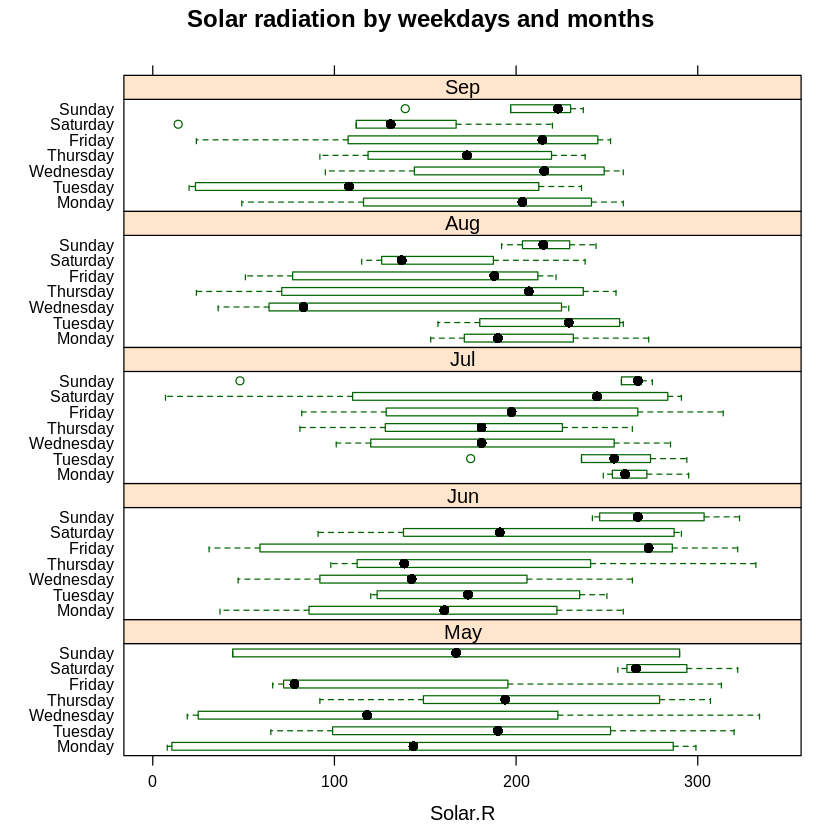

In [5]:
bwplot(Weekday~Solar.R | MonthAbb, data = airquality, layout=c(1, 5), main="Solar radiation by weekdays and months")

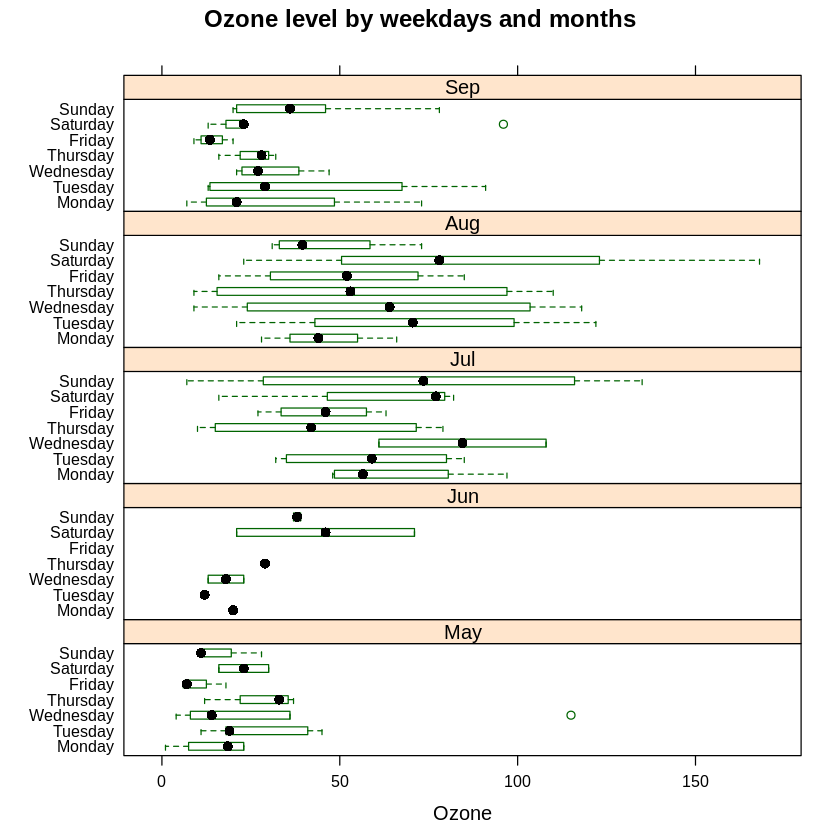

In [6]:
bwplot(Weekday~Ozone | MonthAbb, data = airquality, layout=c(1, 5), main="Ozone level by weekdays and months")

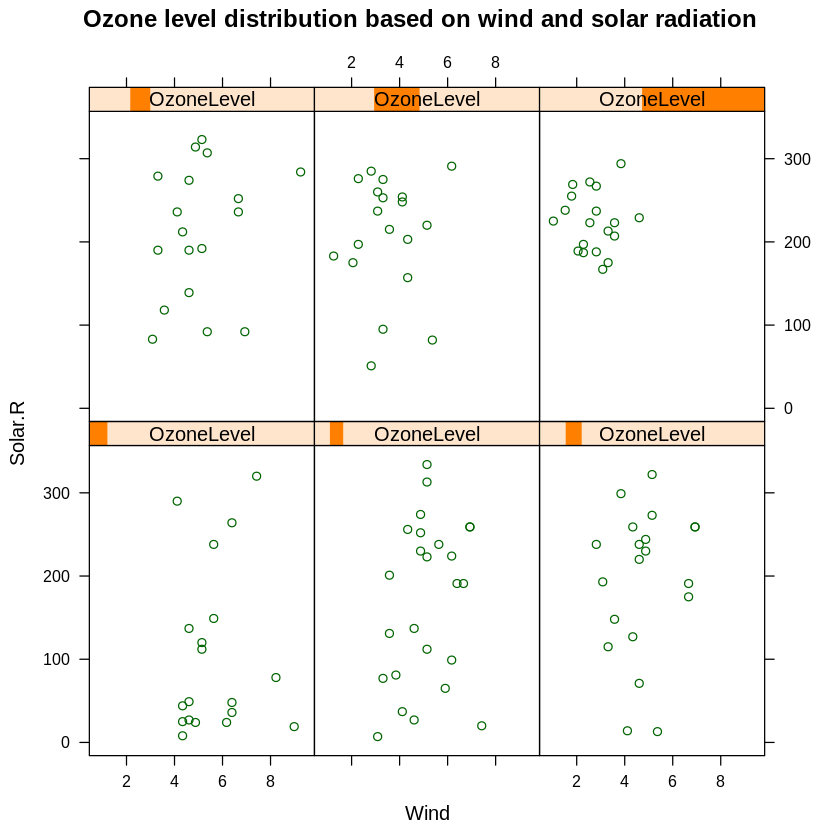

In [7]:
OzoneLevel <- equal.count(airquality$Ozone, number = 6, overlap=0)
xyplot(Solar.R ~ Wind | OzoneLevel, data=airquality, main="Ozone level distribution based on wind and solar radiation")

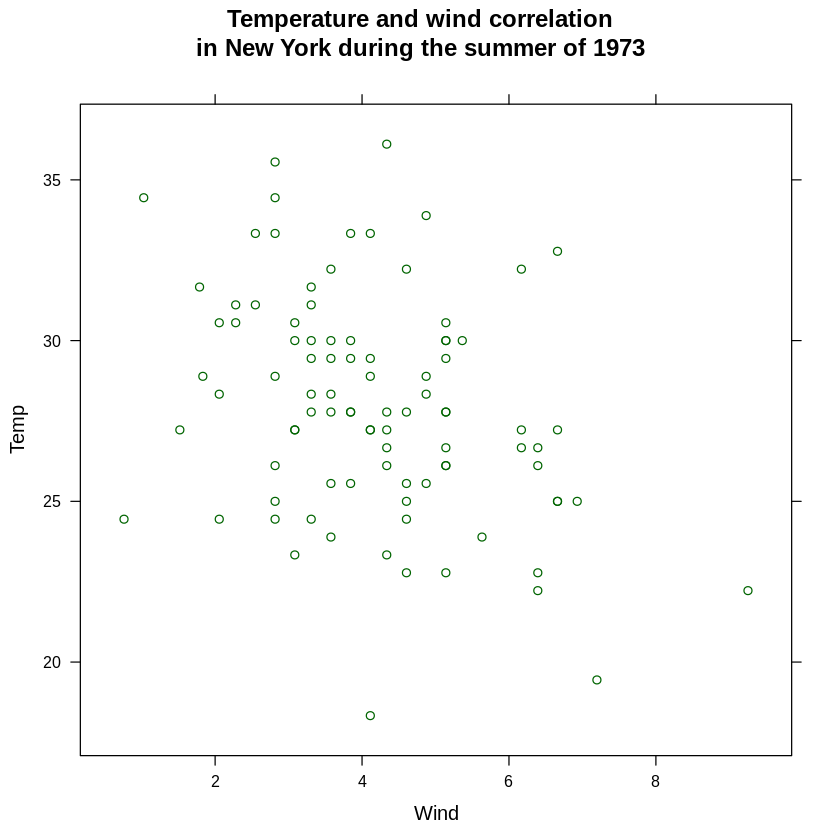

In [8]:
xyplot(Temp ~ Wind, subset=Month > 5 & Month < 9, data=airquality, main="Temperature and wind correlation\nin New York during the summer of 1973")

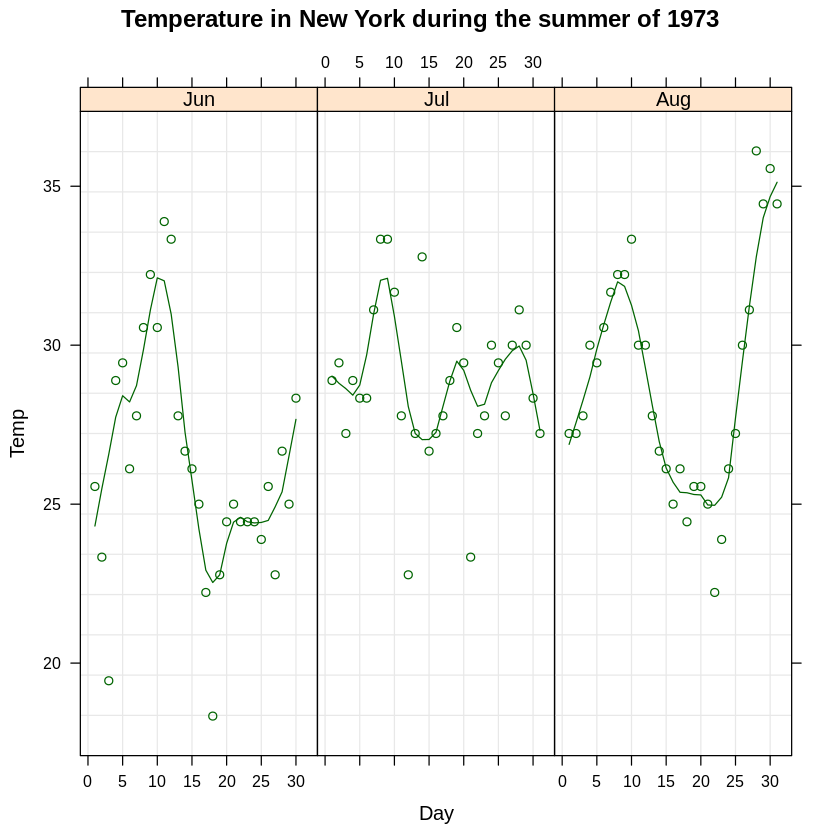

In [9]:
xyplot(Temp ~ Day | MonthAbb, subset=Month > 5 & Month < 9, data=airquality, layout=c(3, 1),
      panel = function(x, y) {
          panel.grid(h = 15, v = -1)
          panel.xyplot(x, y)
          llines(lowess(x, y, f=0.2))
      },
      main="Temperature in New York during the summer of 1973")

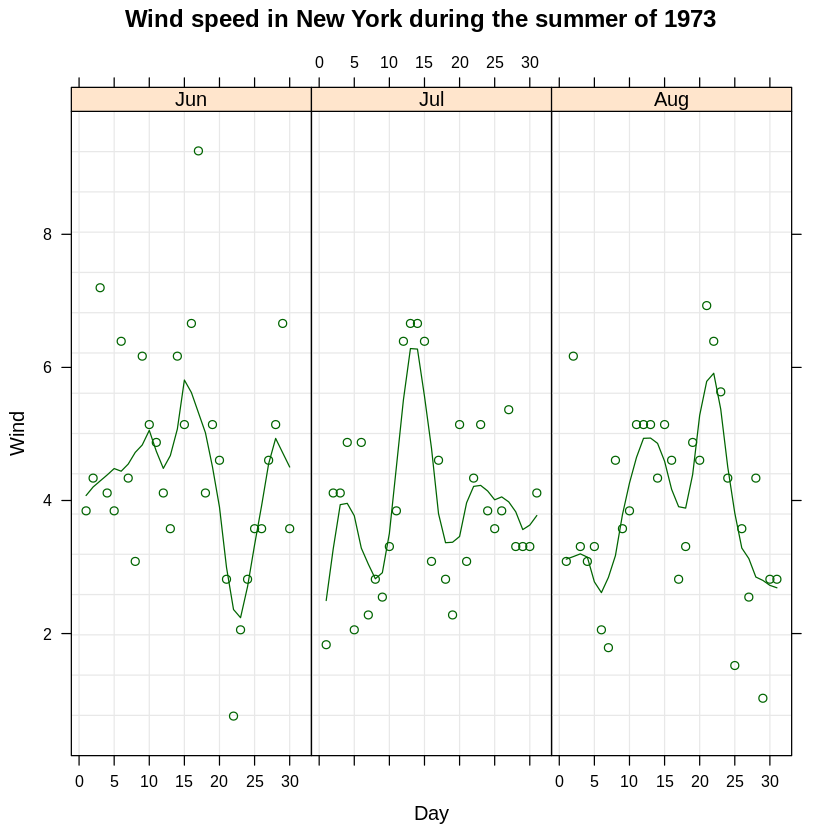

In [10]:
xyplot(Wind ~ Day | MonthAbb, subset=Month > 5 & Month < 9, data=airquality, layout=c(3, 1),
      panel = function(x, y) {
          panel.grid(h = 15, v = -1)
          panel.xyplot(x, y)
          llines(lowess(x, y, f=0.2))
      },
      main="Wind speed in New York during the summer of 1973")

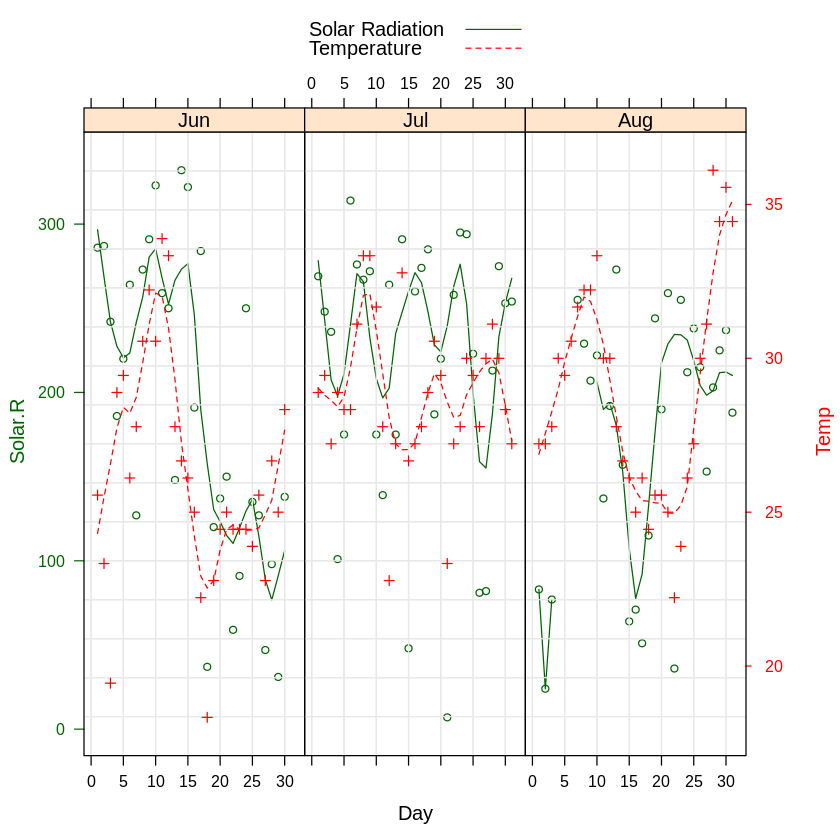

In [11]:
solar <- xyplot(Solar.R ~ Day | MonthAbb, subset=Month > 5 & Month < 9, data=airquality, layout=c(3, 1),
      panel = function(x, y) {
          panel.grid(h = 15, v = -1)
          panel.xyplot(x, y)
          llines(lowess(x, y, f=0.2))
      })
temp <- xyplot(Temp ~ Day | MonthAbb, subset=Month > 5 & Month < 9, data=airquality, layout=c(3, 1),
      panel = function(x, y) {
          panel.grid(h = 15, v = -1)
          panel.xyplot(x, y)
          llines(lowess(x, y, f=0.2))
      })
doubleYScale(solar, temp, add.ylab2=TRUE, text = c("Solar Radiation", "Temperature"))